In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.patches as patches

## Scientific model

Variables:
- S = sex (0 if female, 1 if male)
- H = height in centimeters
- W = weight in kilograms
- U = unmeasured influence on height
- V = unmeasured influence on weight

DAG:

```
┌───┐                         ┌───┐
│ U │──▶  H  ────────▶  W  ◀──│ V │
└───┘                         └───┘
          ▲             ▲          
          │             │          
                        │          
          S  ───────────┘          
```

Functions:
$$
\begin{align}
  S \sim & \enspace Uniform(0,1) \\
  U \sim & \enspace Normal(0,5) \\
  V \sim & \enspace Normal(0,5) \\
  H =    & \enspace \mathcal{f}_H(S, U) \\
  W =    & \enspace \mathcal{f}_W(H, S, V) \\  
\end{align}
$$

Questions:

- Q: causal effect of H on W?
- Q: causal effect of S on W?
- Q: *direct* causal effect of S on W?

Stratify by S: different estimate for each value that S can take.

## Generative model

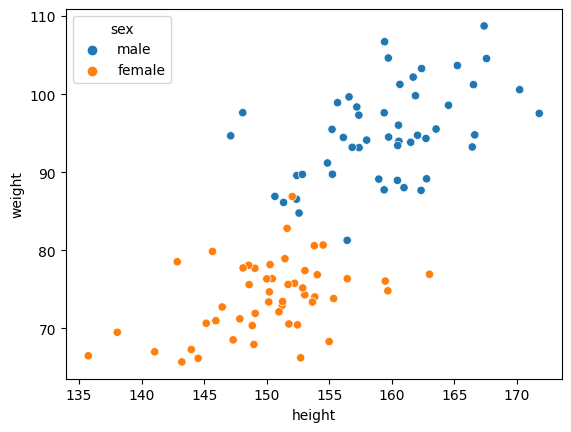

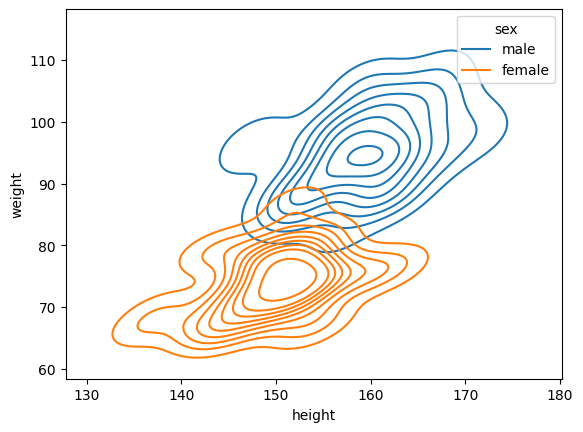

In [50]:
def make_population(n, p_female=0.5):
    return np.random.choice(2, p=[p_female, 1-p_female], size=n)

def sim_heightweight(sex, alpha, beta):
    """
    sex: n-vector of categories: 0=male, 1=female
    alpha: 2-vector of sex-specific bias on weight
    beta: 2-vector of sex-specific multiplier on height 
    """
    n = len(sex)
    a = alpha[sex]
    b = beta[sex]
    sex_height = np.array([150, 160])
    height = sex_height[sex] + np.random.normal(0,5, size=n)
    weight = a + b*height + np.random.normal(0,5, size=n)
    sex_labels = np.array(['female', 'male'])
    sex_names = sex_labels[sex]
    return pd.DataFrame(zip(sex, sex_names, height, weight), columns=['sex_01', 'sex', 'height', 'weight'])

n = 100
sex = make_population(n)
alpha = np.array([0,0])
beta = np.array([0.5, 0.6])
sample = sim_heightweight(sex=sex, alpha=alpha, beta=beta)
sns.scatterplot(data=sample, x='height', y='weight', hue='sex')
plt.show()
sns.kdeplot(data=sample, x='height', y='weight', label='Female', hue='sex')
plt.show()

## Simulated casual effect of sex

Answering "Q: causal effect of S on W?" using simulation.

In [53]:
females = make_population(n, p_female=1.0)
males = make_population(n, p_female=0.0)
alpha = np.array([0,0])
beta = np.array([0.5, 0.6])

weight_female = sim_heightweight(sex=females, alpha=alpha, beta=beta).weight
weight_male = sim_heightweight(sex=males, alpha=alpha, beta=beta).weight
# effect of sex
print('Effect of male on weight =', (weight_male - weight_female).mean())


Effect of male on weight = 20.62070393981012
